In [1]:
%matplotlib notebook
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import scipy.sparse.linalg

pylab.rcParams['figure.figsize'] = (10., 10.)

In [2]:
np.random.seed(2)
R1 = np.random.randn(150)*0.35 
R2 = np.random.randn(150)*0.35 + 2.5
R3 = np.random.randn(150)*0.35 + 5
theta1 = np.random.rand(150)*(2*np.pi)
theta2 = np.random.rand(150)*(2*np.pi)
theta3 = np.random.rand(150)*(2*np.pi)
X1 = np.array([R1*np.cos(theta1), R1*np.sin(theta1)]).T
X2 = np.array([R2*np.cos(theta2), R2*np.sin(theta2)]).T
X3 = np.array([R3*np.cos(theta3), R3*np.sin(theta3)]).T

<IPython.core.display.Javascript object>


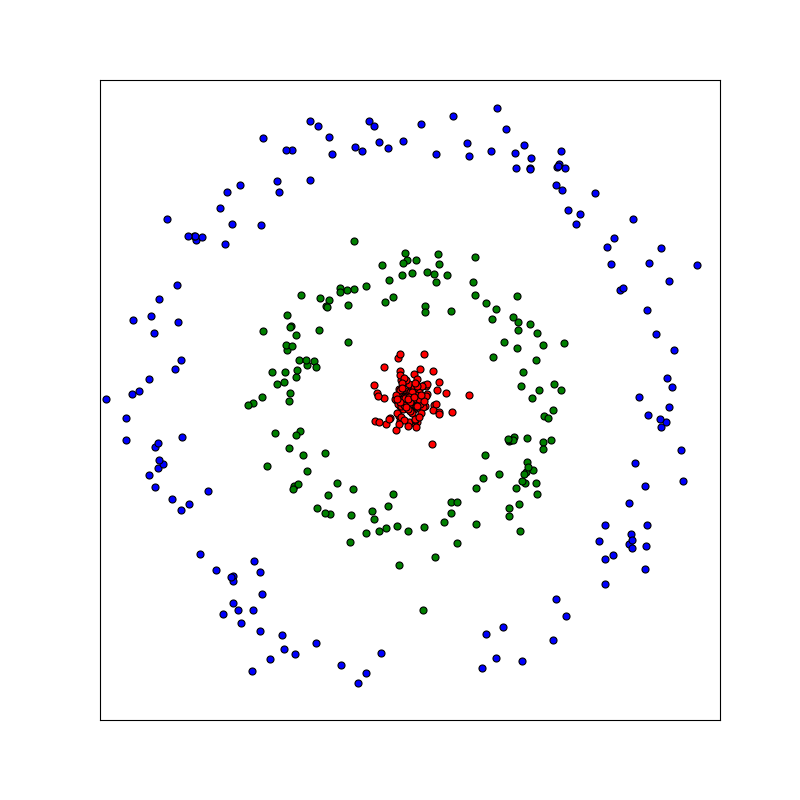

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.scatter(X1[:, 0], X1[:, 1], c='r', s=40)
ax.scatter(X2[:, 0], X2[:, 1], c='g', s=40)
ax.scatter(X3[:, 0], X3[:, 1], c='b', s=40)

In [6]:
c = 1
k = 10
data = np.append(X1, X2, axis=0)
data = np.append(data, X3, axis=0)
D = np.ones([450, 450])
K = np.zeros([450, 450])
for i in xrange(450):
    for j in xrange(i+1):
        D[i, j] = np.linalg.norm(data[i] - data[j])
        D[j, i] = D[i, j]
        K[i, j] = np.exp(-D[i, j]**2/c)
        K[j, i] = K[i, j]

In [7]:
E = [1]*450
for i in xrange(450):
    E[i] = np.argpartition(D[i], k)[:k]
W = np.zeros([450, 450])
for i in xrange(450):
    for j in E[i]:
        W[i, j] = K[i, j]
        W[j, i] = K[i, j]
    W[i, i] = 0
L = -W 
for i in xrange(450):
    L[i, i] = np.sum(W[i])
    L[i] /= np.sum(W[i])

In [8]:
S, V= scipy.linalg.eig(L)

<IPython.core.display.Javascript object>


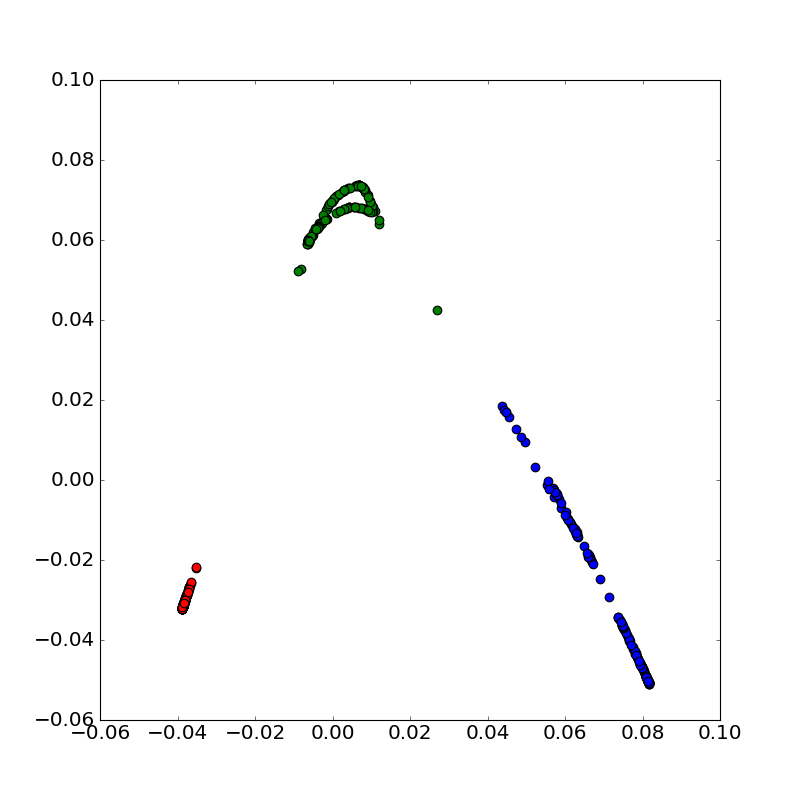

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(axis='x', labelsize='18')
ax.tick_params(axis='y', labelsize='18')
ax.scatter(V[:150, 1], V[:150, 2], c='r', s=60)
ax.scatter(V[150:300, 1], V[150:300, 2], c='g', s=60)
ax.scatter(V[300:, 1], V[300:, 2], c='b', s=60)

<IPython.core.display.Javascript object>


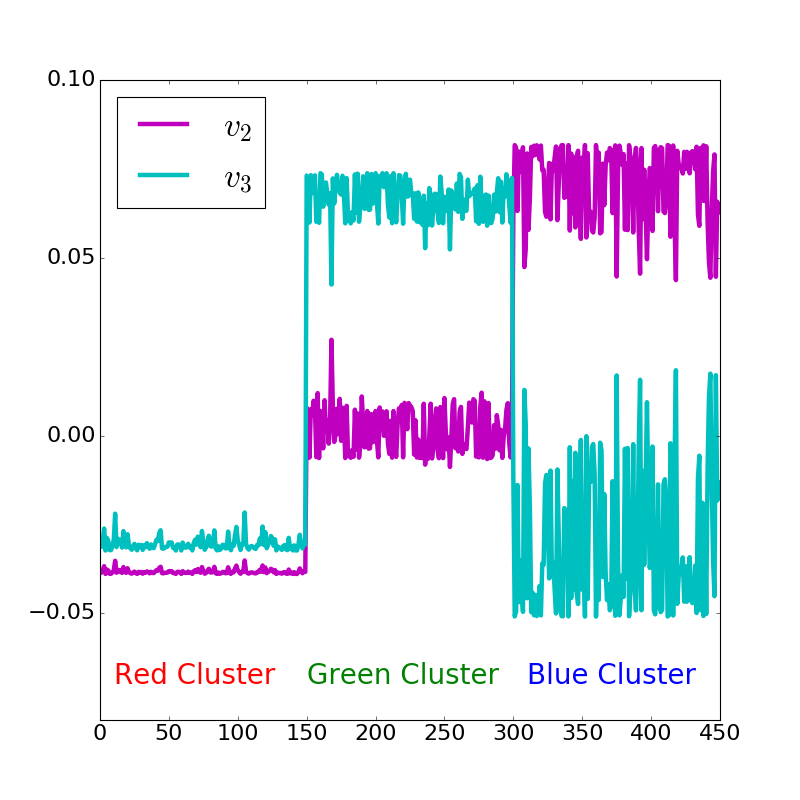

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylim(-0.08, 0.1)
ax.plot(xrange(450), V[:, 1], lw='4', c='m', label='$v_2$')
ax.plot(xrange(450), V[:, 2], lw='4', c='c', label='$v_3$')


ax.legend(loc='upper left', fontsize=30)

ax.text(10, -0.07, 'Red Cluster', color='r', fontsize=25)
ax.text(150, -0.07, 'Green Cluster', color='g', fontsize=25)
ax.text(310, -0.07, 'Blue Cluster', color='b', fontsize=25)

<IPython.core.display.Javascript object>


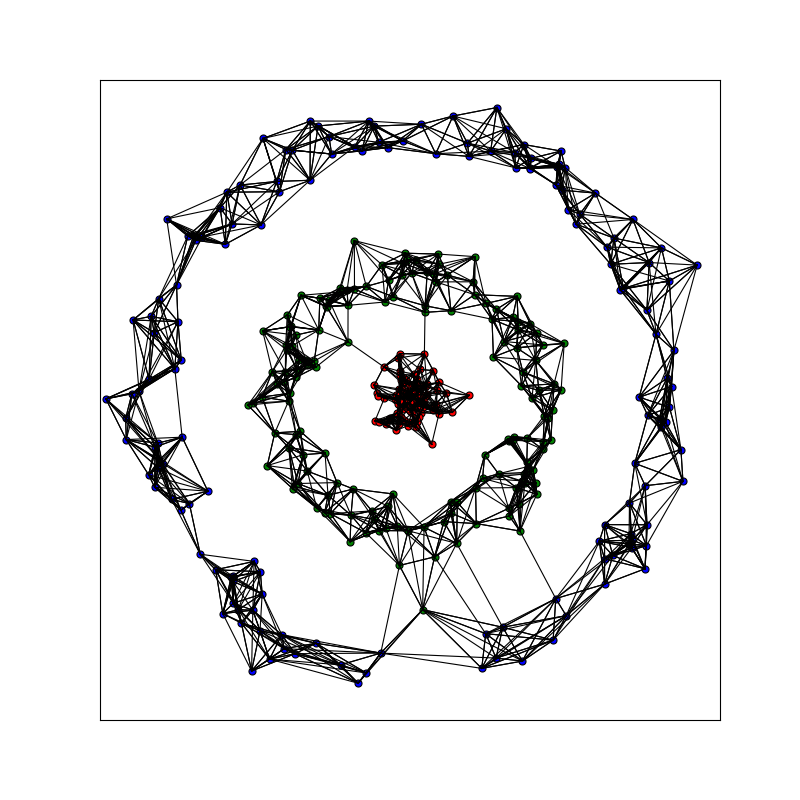

In [28]:
def plotline(x, y, ax):
    ax.plot([x[0], y[0]], [x[1], y[1]], c='k')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks(())
ax.set_yticks(())
ax.scatter(X1[:, 0], X1[:, 1], c='r', s=40)
ax.scatter(X2[:, 0], X2[:, 1], c='g', s=40)
ax.scatter(X3[:, 0], X3[:, 1], c='b', s=40)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

for i in xrange(450):
    for j in E[i]:
        if j != i:
            plotline(data[i], data[j], ax)

In [31]:
def k_means(data, init_means, iterations):
    n_data, ndim = data.shape
    k = init_means.shape[0]
    old_means = np.array(init_means)
    means = np.array(init_means)
    distances = np.zeros([n_data, k])
    c_assignments = np.zeros([n_data])
    for t in xrange(iterations):
        for j in xrange(k):
            distances[:, j] = np.apply_along_axis(lambda x: np.linalg.norm(x - means[j]), 1, data)
        c_assignments = np.argmin(distances, 1)
        old_means = np.array(means)
        means = np.zeros([k, ndim])
        c_counts = np.zeros([k])
        for i in xrange(n_data):
            c_counts[c_assignments[i]] += 1
            means[c_assignments[i]] += data[i]
        for j in xrange(k):
            means[j] /= c_counts[j]
    return c_assignments, old_means, means

In [32]:
init_means = np.random.rand(3, 2)
c, m, mm = k_means(data, init_means, 20)

<IPython.core.display.Javascript object>


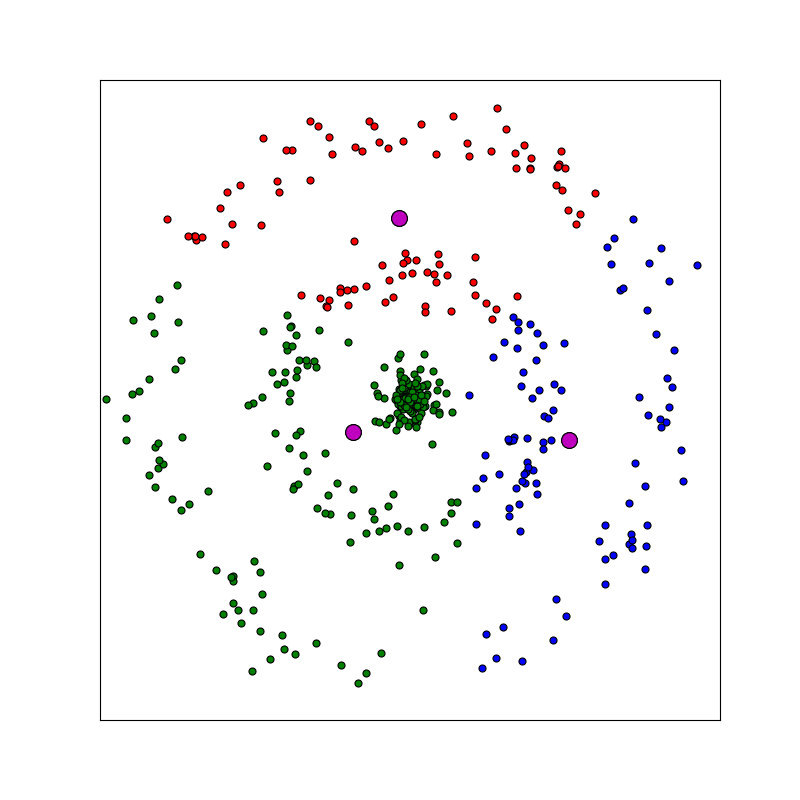

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data[c==0][:, 0], data[c==0][:, 1], c='b', s=40)
ax.scatter(data[c==1][:, 0], data[c==1][:, 1], c='g', s=40)
ax.scatter(data[c==2][:, 0], data[c==2][:, 1], c='r', s=40)
ax.scatter(m[:, 0], m[:, 1], c='y', s=200)
ax.scatter(mm[:, 0], mm[:, 1], c='m', s=200)
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
if np.linalg.norm(m - mm, 'fro') > 1e-4:
    ax.arrow(m[0, 0], m[0, 1], 0.8*(mm[0, 0]-m[0, 0]), 0.8*(mm[0, 1]-m[0, 1]), fc='k',ec='k', lw=4, head_width=0.05)
    ax.arrow(m[1, 0], m[1, 1], 0.8*(mm[1, 0]-m[1, 0]), 0.8*(mm[1, 1]-m[1, 1]), fc='k',ec='k', lw=4, head_width=0.05)
    ax.arrow(m[2, 0], m[2, 1], 0.8*(mm[2, 0]-m[2, 0]), 0.8*(mm[2, 1]-m[2, 1]), fc='k',ec='k', lw=4, head_width=0.05)